<a href="https://colab.research.google.com/github/rowii7/Projects/blob/main/market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import matplotlib.pyplot as plt

transactions = []
with open('/content/drive/MyDrive/basket (1).txt' ,'r') as file:
    for line in file:
        transactions.append(line.strip().split(' '))
sorted_transactions = [sorted(transaction) for transaction in transactions]

te = TransactionEncoder()
te_ary = te.fit(sorted_transactions).transform(sorted_transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()


,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
0,False,False,False,False,False,True,False,False,True,False,True,False,True,True,True,False,False,False,False,True
1,False,False,False,True,False,False,False,False,True,True,False,True,True,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True
3,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


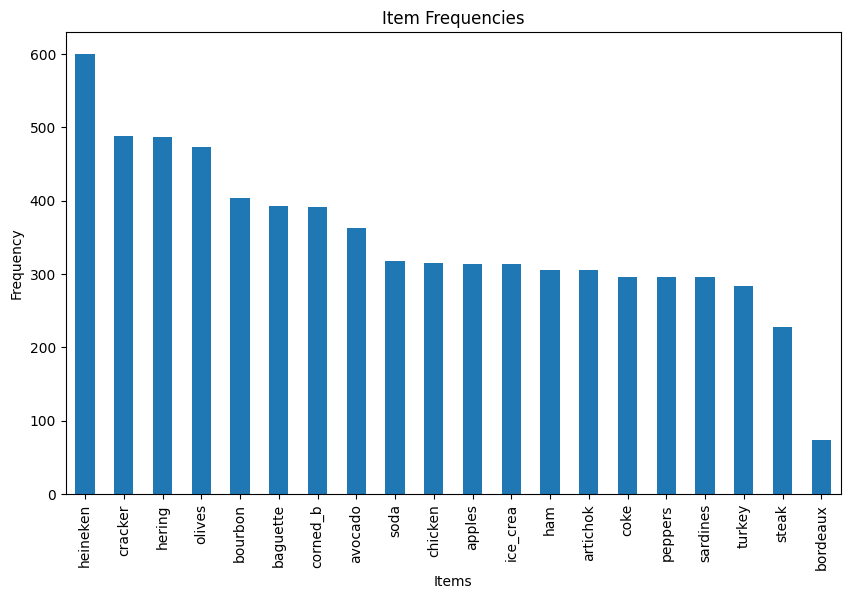

In [ ]:
item_frequencies = df.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
item_frequencies.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequencies')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Apriori algorithm
frequent_itemsets_apriori = apriori(df, min_support=0.1, use_colnames=True )
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.5)
print("Frequent Itemsets using Apriori:")
print(frequent_itemsets_apriori)
print("\nAssociation Rules using Apriori:")
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets using Apriori:
      support                                       itemsets
0    0.313686                                       (apples)
1    0.304695                                     (artichok)
2    0.362637                                      (avocado)
3    0.391608                                     (baguette)
4    0.402597                                      (bourbon)
..        ...                                            ...
214  0.102897                  (ham, hering, olives, turkey)
215  0.114885    (baguette, hering, heineken, soda, cracker)
216  0.105894     (bourbon, heineken, soda, olives, cracker)
217  0.115884  (ice_crea, coke, heineken, sardines, chicken)
218  0.101898        (turkey, corned_b, ham, hering, olives)

[219 rows x 2 columns]

Association Rules using Apriori:
          antecedents                 consequents   support  confidence  \
0            (apples)                    (hering)  0.156843    0.500000   
1            (apples)      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# FP-Growth algorithm
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.1, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.5)
print("\nFrequent Itemsets using FP-Growth:")
print(frequent_itemsets_fpgrowth)
print("\nAssociation Rules using FP-Growth:")
print(rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets using FP-Growth:
      support                      itemsets
0    0.485514                      (hering)
1    0.472527                      (olives)
2    0.402597                     (bourbon)
3    0.390609                    (corned_b)
4    0.312687                    (ice_crea)
..        ...                           ...
214  0.163836            (chicken, cracker)
215  0.146853            (bourbon, chicken)
216  0.142857           (corned_b, chicken)
217  0.112887   (bourbon, chicken, cracker)
218  0.100899  (corned_b, chicken, cracker)

[219 rows x 2 columns]

Association Rules using FP-Growth:
             antecedents consequents   support  confidence      lift
0               (hering)  (heineken)  0.287712    0.592593  0.988642
1     (hering, heineken)   (cracker)  0.162837    0.565972  1.160939
2      (hering, cracker)  (heineken)  0.162837    0.810945  1.352927
3               (hering)    (olives)  0.255744    0.526749  1.114748
4               (olives)    (he

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def inspect(rules):
    lhs = [', '.join(list(x)) for x in rules['antecedents']]
    rhs = [', '.join(list(x)) for x in rules['consequents']]
    support = rules['support']
    confidence = rules['confidence']
    lift = rules['lift']
    return pd.DataFrame({'Left Hand Side': lhs, 'Right Hand Side': rhs, 'Support': support, 'Confidence': confidence, 'Lift': lift})
print("\nAssociation Rules using Apriori:")
inspected_rules = inspect(rules_apriori).sort_values(by='Confidence', ascending=False)
inspected_rules


Association Rules using Apriori:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
528,"chicken, coke, ice_crea, heineken",sardines,0.115884,1.000000,3.381757
552,"corned_b, ham, hering, turkey",olives,0.101898,1.000000,2.116279
492,"baguette, soda, hering, cracker",heineken,0.114885,1.000000,1.668333
537,"sardines, ice_crea, chicken","coke, heineken",0.115884,1.000000,5.752874
531,"chicken, coke, sardines, heineken",ice_crea,0.115884,1.000000,3.198083
...,...,...,...,...,...
241,"soda, cracker",olives,0.125874,0.501992,1.062355
334,"soda, cracker","baguette, heineken",0.125874,0.501992,1.925264
29,olives,corned_b,0.236763,0.501057,1.282757
24,coke,olives,0.147852,0.500000,1.058140


In [ ]:
print("\nAssociation Rules using FP-Growth:")
inspected_rules2 = inspect(rules_fpgrowth).sort_values(by='Confidence', ascending=False)

inspected_rules2


Association Rules using FP-Growth:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
460,"chicken, coke, ice_crea, heineken",sardines,0.115884,1.000000,3.381757
262,"baguette, soda, hering, cracker",heineken,0.114885,1.000000,1.668333
461,"sardines, coke, ice_crea, chicken",heineken,0.115884,1.000000,1.668333
145,"corned_b, ham, hering, turkey",olives,0.101898,1.000000,2.116279
462,"sardines, chicken, ice_crea, heineken",coke,0.115884,1.000000,3.381757
...,...,...,...,...,...
251,"soda, cracker","baguette, heineken",0.125874,0.501992,1.925264
220,"soda, cracker",olives,0.125874,0.501992,1.062355
29,olives,corned_b,0.236763,0.501057,1.282757
486,coke,olives,0.147852,0.500000,1.058140


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


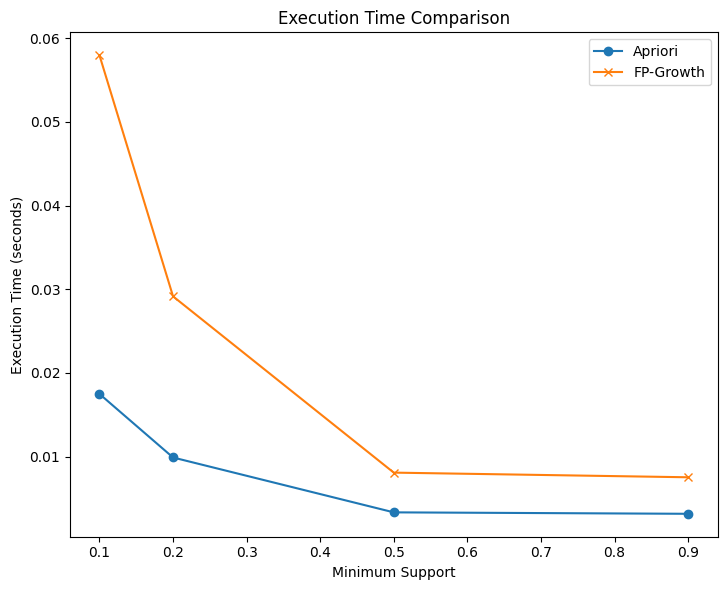

In [ ]:
import time
def run_apriori(data, min_support):
    start_time = time.time()
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    end_time = time.time()
    duration = end_time - start_time
    return frequent_itemsets, duration

def run_fpgrowth(data, min_support):
    start_time = time.time()
    frequent_itemsets = fpgrowth(data, min_support=min_support, use_colnames=True)
    end_time = time.time()
    duration = end_time - start_time
    return frequent_itemsets, duration

min_support_values = [0.1,0.2,0.5,0.9]

apriori_times = []
fpgrowth_times = []
apriori_itemsets_count = []
fpgrowth_itemsets_count = []

for min_support in min_support_values:
    apriori_itemsets, apriori_time = run_apriori(df, min_support)
    fpgrowth_itemsets, fpgrowth_time = run_fpgrowth(df, min_support)

    apriori_times.append(apriori_time)
    fpgrowth_times.append(fpgrowth_time)
    apriori_itemsets_count.append(len(apriori_itemsets))
    fpgrowth_itemsets_count.append(len(fpgrowth_itemsets))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(min_support_values, apriori_times, marker='o', label='Apriori')
plt.plot(min_support_values, fpgrowth_times, marker='x', label='FP-Growth')
plt.title('Execution Time Comparison')
plt.xlabel('Minimum Support')
plt.ylabel('Execution Time (seconds)')
plt.legend()


plt.tight_layout()
plt.show()